In [ ]:
from google.colab import files
uploaded = files.upload()

Saving 2Mcare_PartD_Spending_2018.csv to 2Mcare_PartD_Spending_2018.csv


In [ ]:
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(io.BytesIO(uploaded['2Mcare_PartD_Spending_2018.csv']))

In [ ]:
### Here are the purposes for the data set...
### 1) Potential DV/IV
### 2) Missing Data
### 3) Transformations 
### 4) central tendency and distribution of responses
### 5) value counts
### 6) quartile ranges (.25, .50, .75),
### 7) create at least separate 3 visualizations that help the reader understand your dataset

### I will insert comments throughout the code to make reference to the corresponding concepts

In [ ]:
# Lets take a look at the initial data set
df

,Brand Name,Generic Name,Number of Manufacturers,Total Spending,Total Dosage Units,Total Claims,Total Beneficiaries,Average Price Per Dose,Average Spending Per Claim,Average Spending Per Beneficiary,Outlier Flag,Change in Average Spending Per Dosage Unit (2017-2018)
0,1st Tier Unifine Pentips,"Pen Needle, Diabetic",1,167193.78,"761,658","6,538","2,341",0.22,$25.57,$71.42,0,1.70%
1,1st Tier Unifine Pentips Plus,"Pen Needle, Diabetic",1,369416.83,"1,814,008","14,932","5,675",0.20,$24.74,$65.10,0,-6.30%
2,Abacavir,Abacavir Sulfate,9,14479715.39,"3,972,983","54,467","7,359",4.04,$265.84,"$1,967.62",0,-5.83%
3,Abacavir-Lamivudine,Abacavir Sulfate/Lamivudine,5,24587440.48,"2,225,584","70,494","8,684",11.06,$348.79,"$2,831.35",1,-45.84%
4,Abacavir-Lamivudine-Zidovudine,Abacavir/Lamivudine/Zidovudine,1,6955321.12,"330,735","5,298",710,21.03,"$1,312.82","$9,796.23",0,-3.04%
...,...,...,...,...,...,...,...,...,...,...,...,...
3469,Zyprexa Zydis,Olanzapine,1,4465981.99,"156,361","3,426",406,29.24,"$1,303.56","$10,999.96",0,7.90%
3470,Zyprexa*,Olanzapine,1,20421145.92,"823,090","18,410","2,182",25.37,"$1,109.24","$9,358.91",0,8.35%
3471,Zytiga,Abiraterone Acetate,2,1475649550.90,"14,842,923","144,948","24,289",108.75,"$10,180.54","$60,753.82",0,29.65%
3472,Zyvox,Linezolid,1,860973.30,"6,628",165,126,203.87,"$5,218.02","$6,833.12",1,25.90%


In [ ]:
### Potential Independent variables : Brand name, number of manufacturers
### Potential Dependent Variables: Total beneficiaries, Total Spending, Average Spending Per Dosage Unit
### We also see that we will need to clean up this data!!
### Lets figure out what type of data this is...

In [ ]:
df.dtypes

Brand Name                                                object
Generic Name                                              object
Number of Manufacturers                                    int64
Total Spending                                            object
Total Dosage Units                                        object
Total Claims                                              object
Total \nBeneficiaries                                     object
Average Spending Per Dosage Unit (Weighted)               object
Average \nSpending Per Claim                              object
Average \nSpending Per Beneficiary                        object
Outlier \nFlag                                            object
Change in Average Spending Per Dosage Unit (2017-2018)    object
dtype: object

In [ ]:
### So here, we see the majority of types are not integers.
### We will need to do multiple transformations!
### Remove the '$' from total spending.
### Remove the ',' commas from all numbers
### Clean up the name of the features and remove '\n'

In [ ]:
### Clean up Total Spending name and convert to float
df['Total Spending'] = df['Total Spending'].str.replace('$', '')
df['Total Spending'] = df['Total Spending'].str.replace(',', '').astype(float)

In [ ]:
### Force pandas to stop using scientific notation, and only use 2 decimals
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [ ]:
### Clean up Average Spending per unit and convert to float
df['Average Spending Per Dosage Unit (Weighted)'] = df['Average Spending Per Dosage Unit (Weighted)'].str.replace('$', '')
df['Average Spending Per Dosage Unit (Weighted)'] = df['Average Spending Per Dosage Unit (Weighted)'].str.replace(',', '').astype(float)

In [ ]:
### Clean up column names
df.rename(columns = {'Total \nBeneficiaries' : 'Total Beneficiaries'}, inplace = True)
df.rename(columns = {'Average \nSpending Per Claim' : 'Average Spending Per Claim'}, inplace = True)
df.rename(columns = {'Average \nSpending Per Beneficiary' : 'Average Spending Per Beneficiary'}, inplace = True)
df.rename(columns = {'Average Spending Per Dosage Unit (Weighted)' : 'Average Price Per Dose'}, inplace = True)
df.rename(columns = {'Outlier \nFlag' : 'Outlier Flag'}, inplace = True)

In [ ]:
### Confirm that our changes to the features worked
df.dtypes

Brand Name                                                 object
Generic Name                                               object
Number of Manufacturers                                     int64
Total Spending                                            float64
Total Dosage Units                                         object
Total Claims                                               object
Total Beneficiaries                                        object
Average Price Per Dose                                    float64
Average Spending Per Claim                                 object
Average Spending Per Beneficiary                           object
Outlier Flag                                               object
Change in Average Spending Per Dosage Unit (2017-2018)     object
dtype: object

In [ ]:
### Beautiful!! Now lets look for the features we will be using...
### Check for any null values

df_temp = pd.DataFrame(df['Total Beneficiaries'])
df_temp_missing = df_temp.apply(lambda x: x.str.strip()).replace('', np.nan)
pd.isnull(df_temp_missing['Total Beneficiaries'])
df_temp_missing.isnull().values.sum()

153

In [ ]:
### We have 153 values that are null but we will not be using Total Beneficiaries
### Lets check Total Spending because we are using this for a plot later
df_check = pd.DataFrame(df['Total Spending'])
df_check.isnull().values.sum()

0

In [ ]:
### Excellent, there are no null values

In [ ]:
### Just having fun - wanted to sort by decending order
### Interesting, what are the 10 most popular drugs that Medicare spends money on?

df_desc = df.sort_values('Total Spending', ascending=False)
df_desc.head(10)

,Brand Name,Generic Name,Number of Manufacturers,Total Spending,Total Dosage Units,Total Claims,Total Beneficiaries,Average Price Per Dose,Average Spending Per Claim,Average Spending Per Beneficiary,Outlier Flag,Change in Average Spending Per Dosage Unit (2017-2018)
992,Eliquis,Apixaban,1,4992184164.40,"713,809,249","9,091,996","1,646,841",7.00,$549.07,"$3,031.37",0,9.04%
2632,Revlimid,Lenalidomide,1,4065088800.50,"5,829,300","285,930","39,456",697.35,"$14,217.08","$103,028.41",0,11.23%
3340,Xarelto,Rivaroxaban,1,3358810708.00,"240,480,958","5,896,570","1,050,679",13.97,$569.62,"$3,196.80",0,9.45%
1532,Januvia,Sitagliptin Phosphate,1,3228917720.20,"226,815,826","4,819,533","919,610",14.24,$669.96,"$3,511.18",0,10.65%
1784,Lyrica,Pregabalin,1,2950257660.50,"391,169,522","5,222,362","905,005",7.55,$564.93,"$3,259.94",0,13.27%
61,Advair Diskus,Fluticasone Propion/Salmeterol,1,2394014929.40,"356,769,179","4,398,707","1,031,076",6.71,$544.25,"$2,321.86",0,7.79%
1379,Humira Pen,Adalimumab,1,2388794496.60,"971,914","394,616","53,684",2457.83,"$6,053.47","$44,497.33",0,9.92%
1635,Lantus Solostar,"Insulin Glargine,Hum.Rec.Anlog",1,2370490821.50,"89,307,638","4,475,777","1,050,705",26.54,$529.63,"$2,256.10",0,6.96%
1438,Imbruvica,Ibrutinib,1,1867207012.50,"7,909,014","165,236","21,934",303.62,"$11,300.24","$85,128.43",0,141.46%
2882,Symbicort,Budesonide/Formoterol Fumarate,1,1751221155.50,"55,342,532","4,265,249","1,039,596",31.63,$410.58,"$1,684.52",0,7.11%


In [ ]:
# This is an interesting relationship between Number of Manufacturers and Total Spending or Average Spending Per Dosage Unit

In [ ]:
df.sample(5)

,Brand Name,Generic Name,Number of Manufacturers,Total Spending,Total Dosage Units,Total Claims,Total Beneficiaries,Average Price Per Dose,Average Spending Per Claim,Average Spending Per Beneficiary,Outlier Flag,Change in Average Spending Per Dosage Unit (2017-2018)
2059,Neomycin-Bacitracin-Poly-HC,Neomycin/Bacit/P-Myx/Hydrocort,2,209782.26,"16,712","4,547","3,547",12.55,$46.14,$59.14,0,-4.31%
1153,Fentora,Fentanyl Citrate,1,13887308.99,"129,424","1,038",106,103.60,"$13,378.91","$131,012.35",0,3.79%
2400,Potassium Chloride-NaCl,Potassium Chloride-0.45% NaCl,2,9231.39,"1,400,507",232,111,0.01,$39.79,$83.17,0,6.23%
214,Arixtra,Fondaparinux Sodium,1,865591.60,"4,561",207,39,196.14,"$4,181.60","$22,194.66",0,0.91%
1313,Glyburide Micronized,"Glyburide,Micronized",4,218306.63,"1,663,303","15,876","4,305",0.13,$13.75,$50.71,0,-5.22%


In [ ]:
### Lets do a value count
df['Number of Manufacturers'].value_counts()

1     2411
2      300
3      137
5       83
7       74
4       73
6       61
8       46
9       42
11      38
10      37
12      28
13      22
15      20
17      18
14      13
16      11
22       9
21       6
18       6
19       5
25       5
23       5
24       4
20       4
26       3
30       2
32       2
31       2
28       2
33       1
38       1
27       1
29       1
44       1
Name: Number of Manufacturers, dtype: int64

In [ ]:
### Look at central tendency, distribution of responses, and quartile ranges
df_group = df.groupby(['Number of Manufacturers'])
df_group.describe()

Total Spending               ... Average Price Per Dose         
                                 count         mean  ...                    75%      max
Number of Manufacturers                              ...                                
1                              2411.00  52716782.61  ...                  50.65 38586.16
2                               300.00  18134759.57  ...                  15.97 20578.21
3                               137.00   6392471.89  ...                   5.50   306.23
4                                73.00  13544467.94  ...                   5.52   176.64
5                                83.00  24760294.10  ...                   4.93    82.06
6                                61.00  21632527.83  ...                   3.58   124.09
7                                74.00  26734960.26  ...                   4.21   374.78
8                                46.00  25025474.50  ...                   2.92    54.26
9                                42.00  53280985.81  ...                   2.76    63.25
10                               37.00  69026236.16  ...                   2.48    34.05
11                               38.00  58894998.45  ...                   2.42   152.07
12                               28.00  63049315.79  ...                   1.47   276.88
13                               22.00  92117711.02  ...                   1.29    43.30
14                               13.00  53440099.49  ...                   0.92    17.04
15                               20.00  79652098.16  ...                   1.04     8.00
16                               11.00  81505370.22  ...                   0.47     2.68
17                               18.00 111331462.19  ...                   0.76     2.97
18                                6.00 158544926.69  ...                   0.79     1.60
19                                5.00  51868584.15  ...                   4.42    20.51
20                                4.00 109463564.39  ...                   0.46     1.16
21                                6.00 239310614.85  ...                   2.04     2.75
22                                9.00 257457365.52  ...                   0.86     4.82
23                                5.00  96434200.14  ...                   0.37     1.13
24                                4.00 108383191.88  ...                   0.34     0.55
25                                5.00 233229623.76  ...                   0.27     0.39
26                                3.00 150778685.00  ...                   0.52     0.93
27                                1.00 529426439.49  ...                   0.29     0.29
28                                2.00 372402844.19  ...                   0.35     0.42
29                                1.00  48320119.59  ...                   0.71     0.71
30                                2.00 137520080.91  ...                   0.92     1.14
31                                2.00 120745792.28  ...                   0.41     0.45
32                                2.00 277863900.06  ...                   0.34     0.41
33                                1.00 189787279.70  ...                   0.06     0.06
38                                1.00 119366824.34  ...                   0.27     0.27
44                                1.00 579940201.97  ...                   0.15     0.15

[35 rows x 16 columns]

In [ ]:
### Try representing this data as a box plot instead of just numbers
df_man1 = pd.DataFrame(df['Number of Manufacturers'])
df_man1.dtypes

Number of Manufacturers    int64
dtype: object

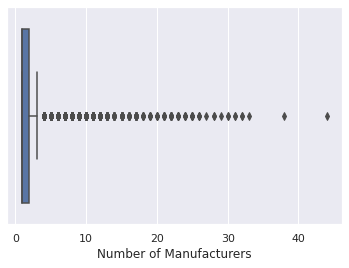

In [ ]:
import seaborn as sns
sns.boxplot(x=df_man1['Number of Manufacturers'])

In [ ]:
### Does medicare spending go to drugs with only one manufacturer?
### Does increasing number of manufacturers decrease price? DV/IV numb.manufacturer/avg spending per unit
### Lets visalize this data differently

[(0.0, 600000000.0)]

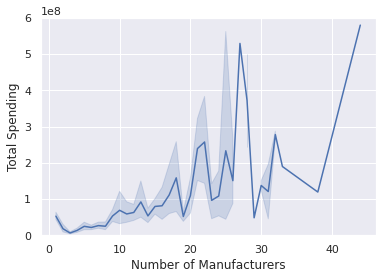

In [ ]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

ax = sns.lineplot(x="Number of Manufacturers", y="Total Spending", data=df)
ax.set(ylim = (0,600000000))

[(1.0, 5.0)]

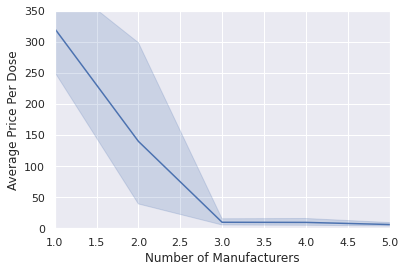

In [ ]:
### Looks like Total spending varies but what about Price Per Dose?
ax = sns.lineplot(x="Number of Manufacturers", y="Average Price Per Dose", data=df)
ax.set(ylim = (0,350))
ax.set(xlim = (1, 5))

In [ ]:
### Wow this is a great visualization that show as the Number of Manufacturers for a drug increases, 
### the Average Price Per dose decreases.
